In [23]:
!apt update
!pip install opencv-python

Get:1 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal InRelease [265 kB]
Get:3 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [859 kB]
Get:4 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [1646 kB]
Get:5 http://security.ubuntu.com/ubuntu focal-security/restricted amd64 Packages [1027 kB]
Get:6 http://security.ubuntu.com/ubuntu focal-security/multiverse amd64 Packages [25.8 kB]
Get:7 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]        
Get:8 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:9 http://archive.ubuntu.com/ubuntu focal/main amd64 Packages [1275 kB]m
Get:10 http://archive.ubuntu.com/ubuntu focal/universe amd64 Packages [11.3 MB]
Get:11 http://archive.ubuntu.com/ubuntu focal/restricted amd64 Packages [33.4 kB]
Get:12 http://archive.ubuntu.com/ubuntu focal/multiverse amd64 Packages [177 kB]
Get:13 http://archive.ubuntu.com/u

In [24]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import time
from IPython.display import clear_output
import math
import cv2

In [7]:
def quaternion_to_euler(w, x, y, z):
 
        t0 = 2 * (w * x + y * z)
        t1 = 1 - 2 * (x * x + y * y)
        X = math.atan2(t0, t1)
 
        t2 = 2 * (w * y - z * x)
        t2 = 1 if t2 > 1 else t2
        t2 = -1 if t2 < -1 else t2
        Y = math.asin(t2)
         
        t3 = 2 * (w * z + x * y)
        t4 = 1 - 2 * (y * y + z * z)
        Z = math.atan2(t3, t4)
 
        return X, Y, Z

In [8]:
quaternion_to_euler(0.566,0.571,0.168,0.571)

(1.2361526827417622, -0.4801429874921799, 1.2361526827417622)

[ERROR:0] VIDEOIO(cvCreateFileCapture_Images(filename.c_str())): raised OpenCV exception:

OpenCV(3.4.11) /opencv-3.4.11/modules/videoio/src/cap_images.cpp:246: error: (-5:Bad argument) CAP_IMAGES: can't find starting number (in the name of file): /notebooks/NSL_ComputerVisionStuff/Data/launch_video.avi in function 'icvExtractPattern'




TypeError: Image data of dtype object cannot be converted to float

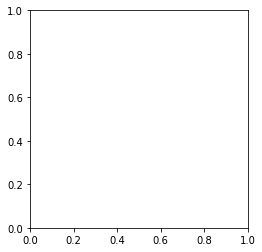

In [58]:
vidcap = cv2.VideoCapture('/notebooks/NSL_ComputerVisionStuff/Data/launch_video.avi')
vidcap.set(cv2.CAP_PROP_POS_MSEC,10000)
success,image = vidcap.read()
plt.imshow(image)

In [56]:
from pathlib import Path

fpath = Path('../../Data/launch_video.avi').absolute()

print(fpath)

/notebooks/NSL_ComputerVisionStuff/Code/img_rectification_stuff/../../Data/launch_video.avi


0.540--> w: 0.442 | x: 0.539 | y:0.455 | z:-0.554


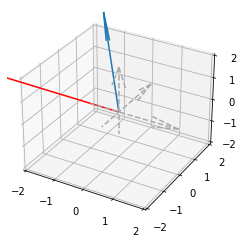

KeyboardInterrupt: 

In [19]:
#ORIENTATION INDEXES-> x: row[4]; y: row[5]; z: row[6]; w: row[7]
#ANGULAR VELOCITY INDEXES-> x: row[17]; y: row[18]; z: row[19]
#LINEAR ACCEL-> x: row[29]; y: row[30]; z: row[31]
with open('../../Data/imu_data.csv') as csv_file:
    print("Linear Acceleration:")
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        clear_output(wait=True)
        if line_count == 0:
            line_count+=1
            continue
        elif line_count ==1:
            s_time=float(row[0])
        c_time=(float(row[0])-s_time)/(10**9)
        print(f'{c_time:.3f}--> w: {float(row[7]):.3f} | x: {float(row[4]):.3f} | y:{float(row[5]):.3f} | z:{float(row[6]):.3f}')
        
        fig=plt.figure()
        ax=plt.axes(projection='3d')
        ax.quiver(-1, 0, 0, 3, 0, 0, color='#aaaaaa',linestyle='dashed')
        ax.quiver(0, -1, 0, 0,3, 0, color='#aaaaaa',linestyle='dashed')
        ax.quiver(0, 0, -1, 0, 0, 3, color='#aaaaaa',linestyle='dashed')
        ax.set_xlim([-2,2])
        ax.set_ylim([-2,2])
        ax.set_zlim([-2,2])
        start=[0,0,0]
        x,y,z=quaternion_to_euler(float(row[7]),float(row[4]),float(row[5]),float(row[6]))
        ax.quiver(0,0,0,x,y,z)
        ax.quiver(0,0,0,float(row[29]),float(row[30]),float(row[31]), color ="#ff0000")
        plt.show()
        line_count+=1
        time.sleep(0.15)